# Classic Models - Products

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import random
import time

import os
from google.colab import drive

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Data Preprocessing and Visualization

### 2.1 Load Data

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Change directory to project folder
os.chdir(r'/content/drive/My Drive/Colab Notebooks/ClassicModels/data')
# List contents of project folder
!ls

Customers      ML	     OrderDetails.csv  Payments		 Products
Customers.csv  Offices.csv   Orders	       Payments.csv	 Products.csv
Employees.csv  OrderDetails  Orders.csv        ProductLines.csv


In [4]:
# Dataframe: Products table
df_products = pd.read_csv('Products.csv', encoding='utf-8')

In [5]:
# Dataframe: Products - Quantity per Product Line
os.chdir(r'/content/drive/My Drive/Colab Notebooks/ClassicModels/data/Products')
df_prod_line = pd.read_csv('P-AmtLeft.csv', encoding='utf-8')

In [6]:
# Dataframe: Products - Customers over Credit Limit
df_prod_cred_limit = pd.read_csv('P-OverCredLimit.csv', encoding='utf-8')

### 2.2. Analyze Data

In [7]:
df_products

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00
...,...,...,...,...,...,...,...,...,...
105,S700_3505,The Titanic,Ships,0.527777778,Carousel DieCast Legends,"Completed model measures 19 1/2 inches long, 9...",1956,51.09,100.17
106,S700_3962,The Queen Mary,Ships,0.527777778,Welly Diecast Productions,Exact replica. Wood and Metal. Many extras inc...,5088,53.63,99.31
107,S700_4002,American Airlines: MD-11S,Planes,0.527777778,Second Gear Diecast,Polished finish. Exact replia with official lo...,8820,36.27,74.03
108,S72_1253,Boeing X-32A JSF,Planes,0.091666667,Motor City Art Classics,10 Wingspan with retractable landing gears. Co...,4857,32.77,49.66


In [8]:
df_prod_line

,productLine,totalQuantity,amountOrdered,amountLeft
0,Classic Cars,5844033,35582,5808451
1,Motorcycles,1915517,12778,1902739
2,Planes,1744036,11872,1732164
3,Ships,732251,8532,723719
4,Trains,450792,2818,447974
5,Trucks and Buses,1003828,11001,992827
6,Vintage Cars,3439570,22933,3416637


In [9]:
df_prod_cred_limit

,customerNumber,totalAmount,creditLimit,balance,overCreditLimit
0,103,12250.56,21000.0,8749.44,0
1,112,48868.26,71800.0,22931.74,0
2,114,110274.00,117300.0,7026.00,0
3,119,97697.82,118200.0,20502.18,0
4,121,62833.27,81700.0,18866.73,0
...,...,...,...,...,...
93,486,44128.02,72600.0,28471.98,0
94,487,25340.25,60300.0,34959.75,0
95,489,18718.11,43300.0,24581.89,0
96,495,40297.05,85100.0,44802.95,0


In [10]:
# Brief info about dataframe - non-null values and datatype
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   productCode         110 non-null    object 
 1   productName         110 non-null    object 
 2   productLine         110 non-null    object 
 3   productScale        110 non-null    object 
 4   productVendor       110 non-null    object 
 5   productDescription  110 non-null    object 
 6   quantityInStock     110 non-null    int64  
 7   buyPrice            110 non-null    float64
 8   MSRP                110 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.9+ KB


In [11]:
df_prod_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productLine    7 non-null      object
 1   totalQuantity  7 non-null      int64 
 2   amountOrdered  7 non-null      int64 
 3   amountLeft     7 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 352.0+ bytes


In [12]:
df_prod_cred_limit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerNumber   98 non-null     int64  
 1   totalAmount      98 non-null     float64
 2   creditLimit      98 non-null     float64
 3   balance          98 non-null     float64
 4   overCreditLimit  98 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


In [13]:
# Check for missing values
df_products.isnull().sum()

productCode           0
productName           0
productLine           0
productScale          0
productVendor         0
productDescription    0
quantityInStock       0
buyPrice              0
MSRP                  0
dtype: int64

In [14]:
df_prod_line.isnull().sum()

productLine      0
totalQuantity    0
amountOrdered    0
amountLeft       0
dtype: int64

In [15]:
df_prod_cred_limit.isnull().sum()

customerNumber     0
totalAmount        0
creditLimit        0
balance            0
overCreditLimit    0
dtype: int64

In [16]:
# # Fill NaN ("not a number") values with blank values
# df_products = df_products.fillna("")
# df_products

In [17]:
# df_products['phone'].str.replace(r"\(.*\)", "")

# df_products

In [18]:
# # -- Drop/impute missing data (if required) --

# # Drop rows with missing values
# df_products = df_products.dropna(axis=0, how='any')

# # ['mean', 'median', 'most_frequent', 'constant']
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imputer.fit_transform(df_products)
# df_products = imputer.transform(df_products)

# df_products.isnull().sum()

In [19]:
# Dataframe statistics on quantitative (numerical) values
df_products.describe()

,quantityInStock,buyPrice,MSRP
count,110.000000,110.000000,110.000000
mean,5046.645455,54.395182,100.438727
std,2939.263668,22.051130,39.663649
min,15.000000,15.910000,33.190000
25%,2419.000000,34.180000,68.907500
50%,5437.500000,53.915000,98.300000
75%,7599.750000,68.675000,122.850000
max,9997.000000,103.420000,214.300000


In [20]:
df_prod_line.describe()

,totalQuantity,amountOrdered,amountLeft
count,7.000000e+00,7.000000,7.000000e+00
mean,2.161432e+06,15073.714286,2.146359e+06
std,1.903452e+06,10858.660088,1.892727e+06
min,4.507920e+05,2818.000000,4.479740e+05
25%,8.680395e+05,9766.500000,8.582730e+05
50%,1.744036e+06,11872.000000,1.732164e+06
75%,2.677544e+06,17855.500000,2.659688e+06
max,5.844033e+06,35582.000000,5.808451e+06


In [21]:
df_prod_cred_limit.describe()

,customerNumber,totalAmount,creditLimit,balance,overCreditLimit
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,288.275510,58962.350612,84228.571429,25266.220816,0.071429
std,118.270856,58316.995972,33479.613739,38939.558410,0.258863
min,103.000000,5307.730000,11000.000000,-266569.880000,0.000000
25%,182.250000,37401.422500,61975.000000,18978.212500,0.000000
50%,280.000000,48824.400000,83150.000000,30003.635000,0.000000
75%,381.750000,63897.077500,100150.000000,42013.582500,0.000000
max,496.000000,494169.880000,227600.000000,75915.830000,1.000000


#### 2.2.1 Define Matrices of Features

In [22]:
# Matrix of features - Products
X_prod = df_products.iloc[:, -3:].values

# Matrix of features - Credit Limit
X_cred_limit = df_prod_cred_limit.iloc[:, :].values

In [23]:
X_prod[:5, :]

array([[7933.  ,   48.81,   95.7 ],
       [7305.  ,   98.58,  214.3 ],
       [6625.  ,   68.99,  118.94],
       [5582.  ,   91.02,  193.66],
       [3252.  ,   85.68,  136.  ]])

In [24]:
X_cred_limit[:5, :]

array([[1.030000e+02, 1.225056e+04, 2.100000e+04, 8.749440e+03,
        0.000000e+00],
       [1.120000e+02, 4.886826e+04, 7.180000e+04, 2.293174e+04,
        0.000000e+00],
       [1.140000e+02, 1.102740e+05, 1.173000e+05, 7.026000e+03,
        0.000000e+00],
       [1.190000e+02, 9.769782e+04, 1.182000e+05, 2.050218e+04,
        0.000000e+00],
       [1.210000e+02, 6.283327e+04, 8.170000e+04, 1.886673e+04,
        0.000000e+00]])

### 2.3. Visualize Data

#### Pairwise Relationships between Features

<Figure size 648x648 with 0 Axes>

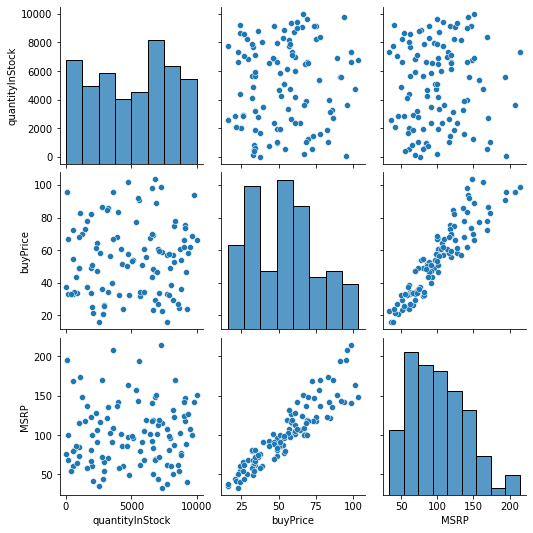

In [25]:
# Define figure
plt.figure(figsize=(9,9))

# Pairwise distributions - Products Dataframe
sns.pairplot(df_products)

# Show figure
plt.show()

<Figure size 648x648 with 0 Axes>

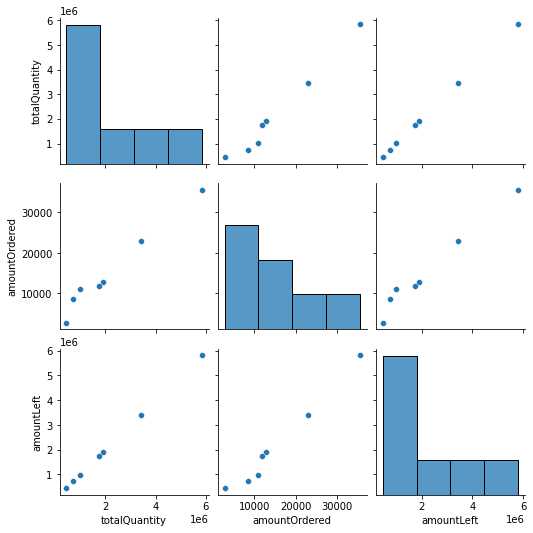

In [26]:
# Define figure
plt.figure(figsize=(9,9))

# Pairwise distributions - Product Line
sns.pairplot(df_prod_line)

# Show figure
plt.show()

<Figure size 648x648 with 0 Axes>

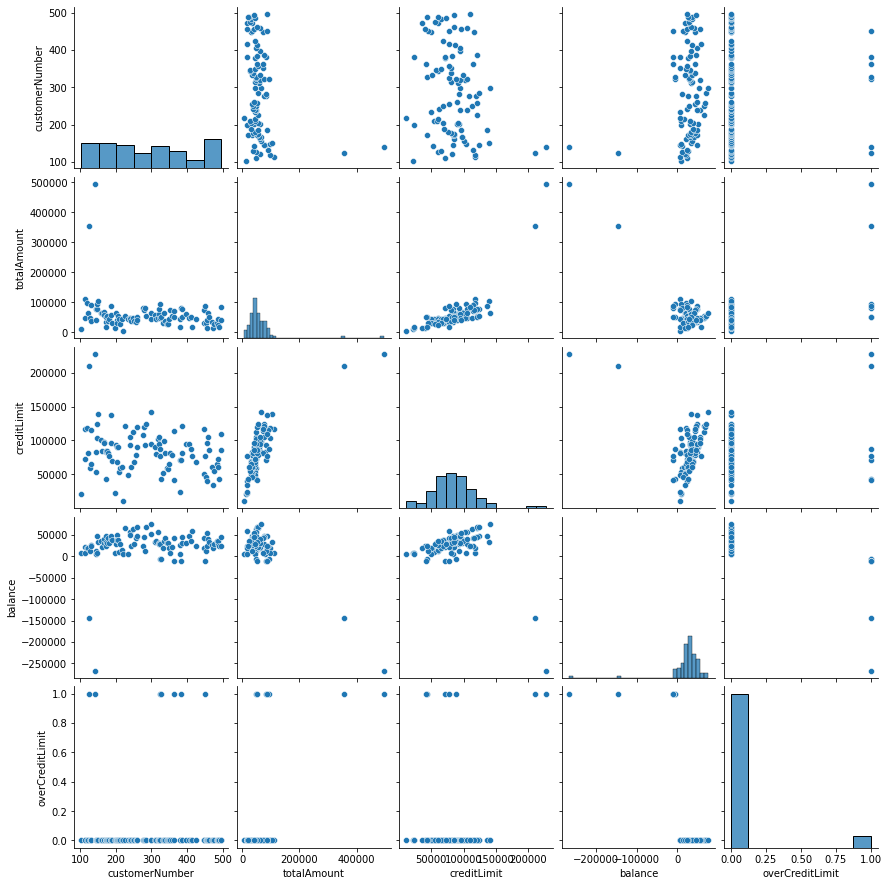

In [27]:
# Define figure
plt.figure(figsize=(9,9))

# Pairwise distributions - Product Credit Limit
sns.pairplot(df_prod_cred_limit)

# Show figure
plt.show()

#### Correlation Map

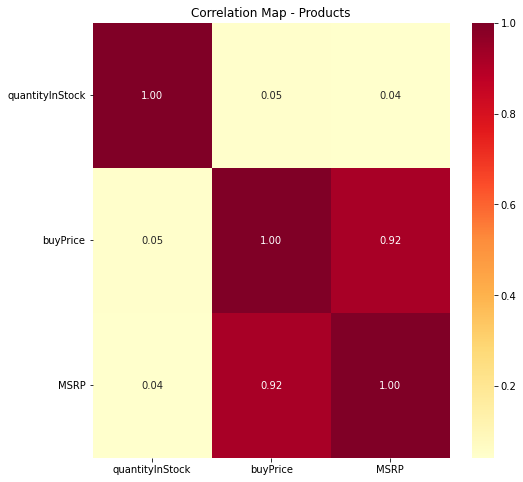

In [28]:
# Define correlation map figure
plt.figure(figsize=(8, 8))

# Correlation Map - Products Dataframe
sns.heatmap(df_products.corr(), cmap='YlOrRd', annot=True, fmt = ".2f")
# Adjust axes labels
plt.xticks(rotation=0)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map - Products')

# Show figure
plt.show()

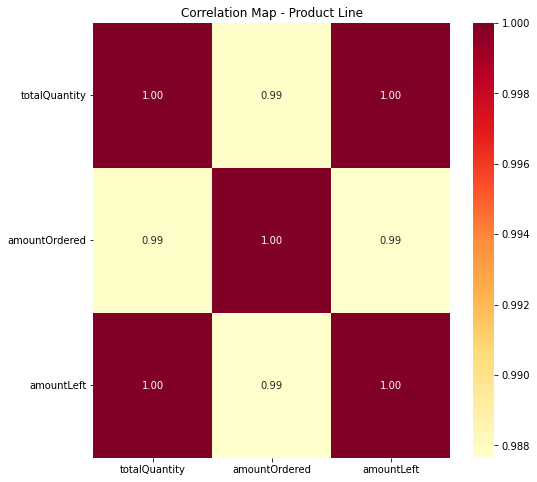

In [29]:
# Define correlation map figure
plt.figure(figsize=(8, 8))

# Correlation Map - Products Line
sns.heatmap(df_prod_line.corr(), cmap='YlOrRd', annot=True, fmt = ".2f")
# Adjust axes labels
plt.xticks(rotation=0)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map - Product Line')

# Show figure
plt.show()

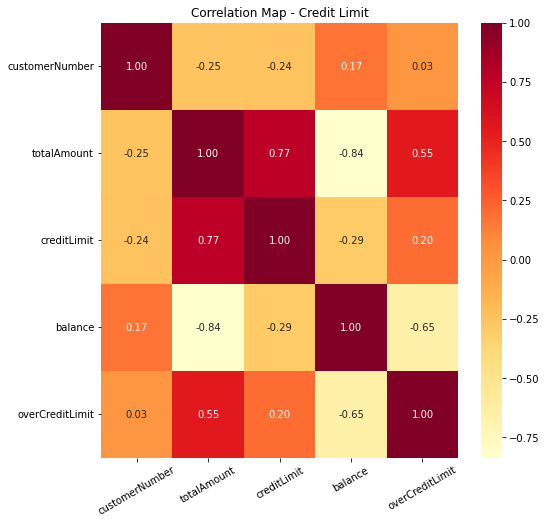

In [30]:
# Define correlation map figure
plt.figure(figsize=(8, 8))

# Correlation Map - Products Credit Limit
sns.heatmap(df_prod_cred_limit.corr(), cmap='YlOrRd', annot=True, fmt = ".2f")
# Adjust axes labels
plt.xticks(rotation=30)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map - Credit Limit')

# Show figure
plt.show()

#### --- Products and Product Line ---

#### Quantity Distribution

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


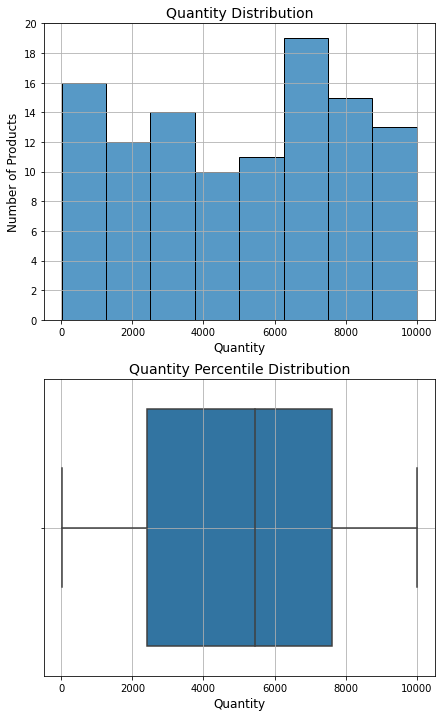

In [31]:
# Define figure
quantity_dist = plt.figure(figsize=(7, 12))

# Quantity histogram
ax1 = quantity_dist.add_subplot(2, 1, 1)
ax1 = sns.histplot(df_products['quantityInStock'])
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(0, 12000, 2000))
plt.yticks(np.arange(0, 22, 2))
# Plot title and labels
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Quantity Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Quantity box plot
ax2 = quantity_dist.add_subplot(2, 1, 2)
ax2 = sns.boxplot(df_products['quantityInStock'])
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(0, 12000, 2000))
# Plot title and labels
plt.xlabel('Quantity', fontsize=12)
plt.title('Quantity Percentile Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

#### Buy Price Distribution

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


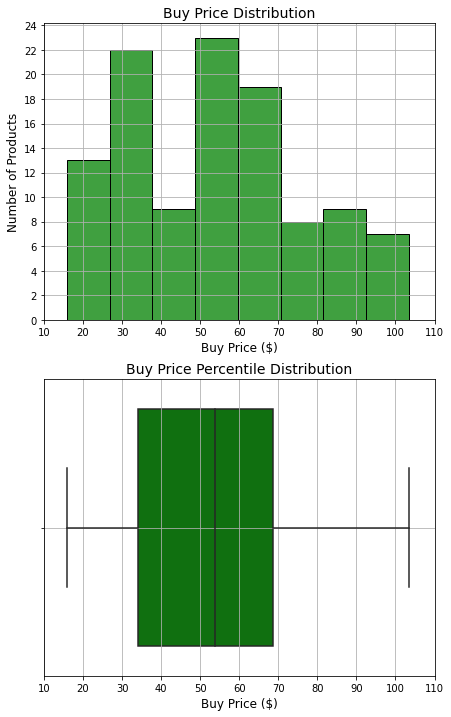

In [32]:
# Define figure
bp_dist = plt.figure(figsize=(7, 12))

# Buy Price histogram
ax1 = bp_dist.add_subplot(2, 1, 1)
ax1 = sns.histplot(df_products['buyPrice'], color='green')
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(10, 120, 10))
plt.yticks(np.arange(0, 26, 2))
# Plot title and labels
plt.xlabel('Buy Price ($)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Buy Price Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Buy Price box plot
ax2 = bp_dist.add_subplot(2, 1, 2)
ax2 = sns.boxplot(df_products['buyPrice'], color='green')
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(10, 120, 10))
# Plot title and labels
plt.xlabel('Buy Price ($)', fontsize=12)
plt.title('Buy Price Percentile Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()

#### Quantity vs. Buy Price

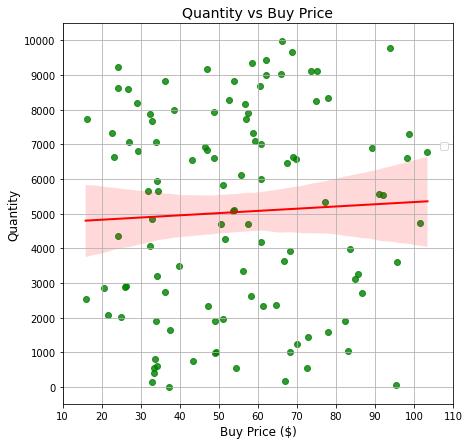

In [33]:
# Define figure
quantity_vs_bp_regplot = plt.figure(figsize=(7, 7))

# Quantity vs Buy Price - regplot
quantity_vs_bp_regplot = sns.regplot(x=df_products['buyPrice'], y=df_products['quantityInStock'], 
                         color='green', line_kws={"lw": 2, "color": "red"})
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(10, 120, 10))
plt.yticks(np.arange(0, 11000, 1000))
# Plot title and labels
plt.xlabel('Buy Price ($)', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity vs Buy Price', fontsize=14)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1, 0.7))
plt.grid(True)

# Show figure
plt.show()

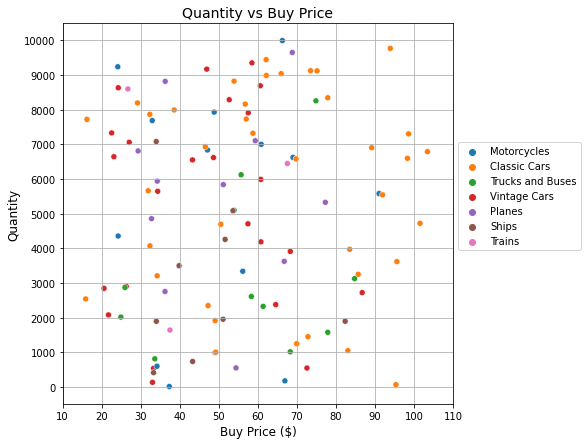

In [34]:
# Define figure
quantity_vs_bp_scatter = plt.figure(figsize=(7, 7))

# Quantity vs Buy Price - scatterplot
quantity_vs_bp_scatter = sns.scatterplot(x=df_products['buyPrice'], y=df_products['quantityInStock'], 
                                   hue=df_products['productLine'])
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(10, 120, 10))
plt.yticks(np.arange(0, 11000, 1000))
# Plot title and labels
plt.xlabel('Buy Price ($)', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity vs Buy Price', fontsize=14)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1, 0.7))
plt.grid(True)

# Show figure
plt.show()

#### MSRP Distribution

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


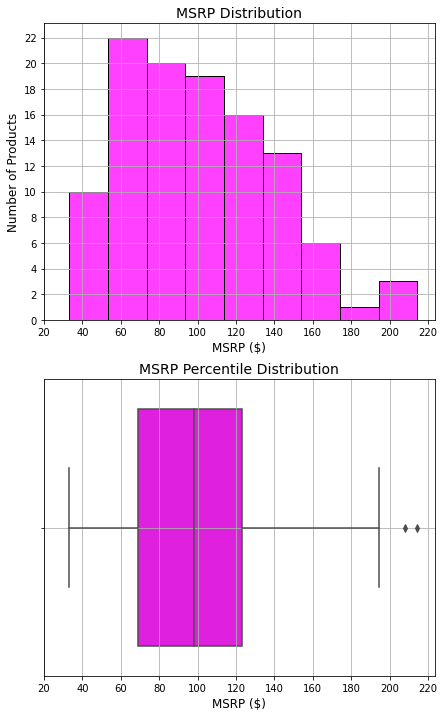

In [35]:
# Define figure
msrp_dist = plt.figure(figsize=(7, 12))

# MSRP histogram
ax1 = msrp_dist.add_subplot(2, 1, 1)
ax1 = sns.histplot(df_products['MSRP'], color='magenta')
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(0, 24, 2))
# Plot title and labels
plt.xlabel('MSRP ($)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('MSRP Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Buy Price box plot
ax2 = msrp_dist.add_subplot(2, 1, 2)
ax2 = sns.boxplot(df_products['MSRP'], color='magenta')
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(20, 240, 20))
# Plot title and labels
plt.xlabel('MSRP ($)', fontsize=12)
plt.title('MSRP Percentile Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

#### Quanity vs. MSRP

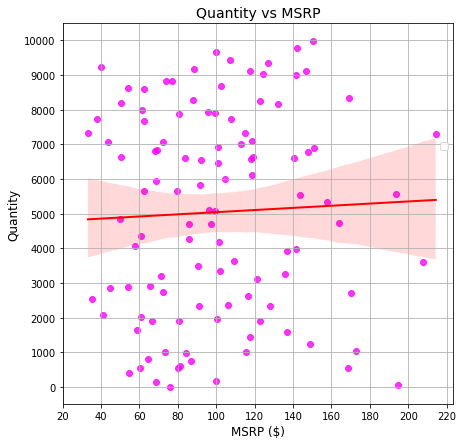

In [36]:
# Define figure
quantity_vs_MSRP_regplot = plt.figure(figsize=(7, 7))

# Quantity vs MSRP - regplot
quantity_vs_MSRP_regplot = sns.regplot(x=df_products['MSRP'], y=df_products['quantityInStock'], 
                         color='magenta', line_kws={"lw": 2, "color": "red"})
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(0, 11000, 1000))
# Plot title and labels
plt.xlabel('MSRP ($)', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity vs MSRP', fontsize=14)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1, 0.7))
plt.grid(True)

# Show figure
plt.show()

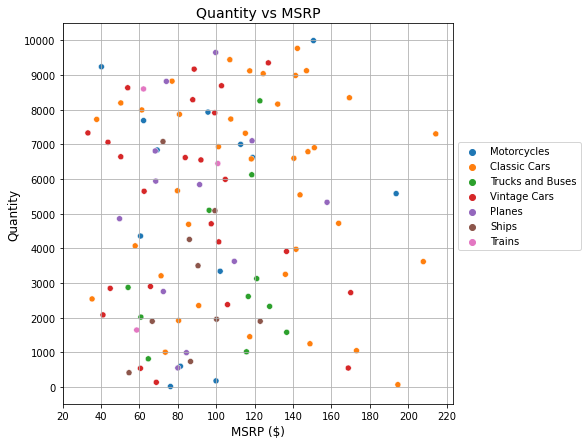

In [37]:
# Define figure
quantity_vs_MSRP_scatter = plt.figure(figsize=(7, 7))

# Quantity vs MSRP - scatterplot
quantity_vs_MSRP_scatter = sns.scatterplot(x=df_products['MSRP'], y=df_products['quantityInStock'], 
                                   hue=df_products['productLine'])
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(0, 11000, 1000))
# Plot title and labels
plt.xlabel('MSRP ($)', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity vs MSRP', fontsize=14)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1, 0.7))
plt.grid(True)

# Show figure
plt.show()

#### Buy Price vs. MSRP

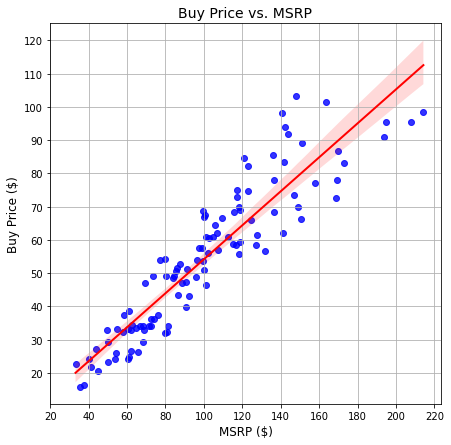

In [38]:
# Define figure
price_comp_regplot = plt.figure(figsize=(7, 7))

# Buy Price vs MSRP - regplot
price_comp_regplot = sns.regplot(x=df_products['MSRP'], y=df_products['buyPrice'], 
                         color='blue', line_kws={"lw": 2, "color": "red"})
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(20, 130, 10))
# Plot title and labels
plt.xlabel('MSRP ($)', fontsize=12)
plt.ylabel('Buy Price ($)', fontsize=12)
plt.title('Buy Price vs. MSRP', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

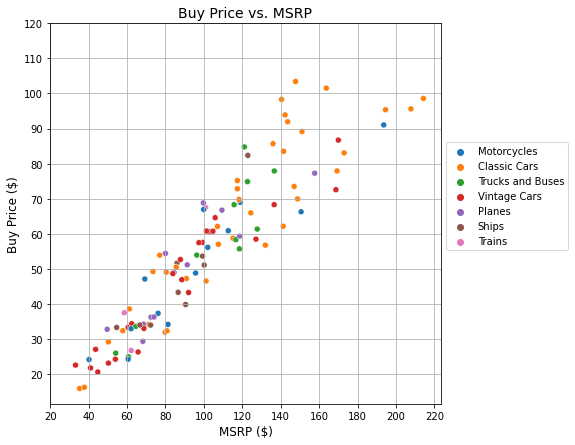

In [39]:
# Define figure
price_comp_scatter = plt.figure(figsize=(7, 7))

# Buy Price vs MSRP - scatterplot
price_comp_scatter = sns.scatterplot(x=df_products['MSRP'], y=df_products['buyPrice'], 
                         hue=df_products['productLine'])
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(20, 130, 10))
# Plot title and labels
plt.xlabel('MSRP ($)', fontsize=12)
plt.ylabel('Buy Price ($)', fontsize=12)
plt.title('Buy Price vs. MSRP', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.7))
plt.grid(True)

# Show figure
plt.show()

#### Product Line

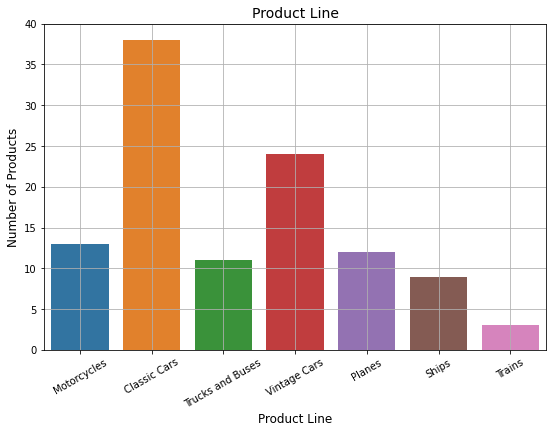

In [40]:
# Define figure
plt.figure(figsize=(9, 6))

# Number of failure rates per age
sns.countplot(x=df_products['productLine'])
# Adjust X and Y-Axes
plt.xticks(rotation=30)
plt.yticks(np.arange(0, 45, 5))
# Plot title and labels
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Product Line', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

#### Product Scale

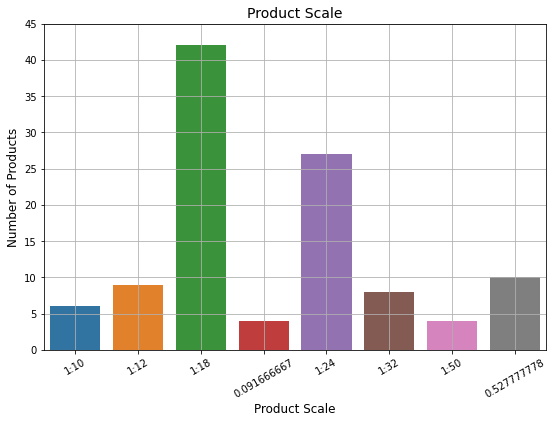

In [41]:
# Define figure
plt.figure(figsize=(9, 6))

# Number of failure rates per age
sns.countplot(x=df_products['productScale'])
# Adjust X and Y-Axes
plt.xticks(rotation=30)
plt.yticks(np.arange(0, 50, 5))
# Plot title and labels
plt.xlabel('Product Scale', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Product Scale', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

#### Percentile Distribution

/usr/local/lib/python3.9/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.9/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.9/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


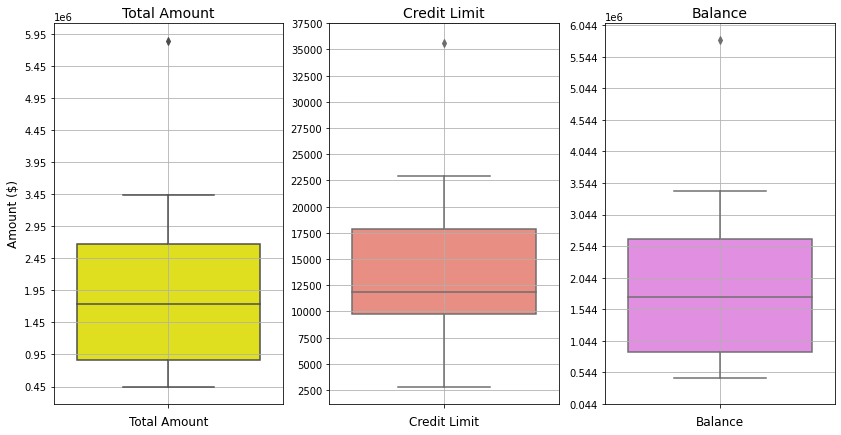

In [42]:
# Combined box plot distributions
box_plots_amount = plt.figure(figsize=(14, 7))

# Total Quantity
ax1 = box_plots_amount.add_subplot(1, 3, 1)
ax1 = sns.boxplot(y=df_prod_line['totalQuantity'], color='yellow', orient='h')
# Adjust X-Axis Range
plt.yticks(np.arange(450000, 6000000, 500000))
# Plot title and labels
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title('Total Amount', fontsize=14)
# Plot grid
plt.grid(True)

# Amount Ordered
ax2 = box_plots_amount.add_subplot(1, 3, 2)
ax2 = sns.boxplot(y=df_prod_line['amountOrdered'], color='salmon', orient='h')
# Adjust X-Axis Range
plt.yticks(np.arange(2500, 40000, 2500))
# Plot title and label
plt.xlabel('Credit Limit', fontsize=12)
plt.ylabel('')
plt.title('Credit Limit', fontsize=14)
# Plot grid
plt.grid(True)

# Amount Left
ax3 = box_plots_amount.add_subplot(1, 3, 3)
ax3 = sns.boxplot(y=df_prod_line['amountLeft'], color='violet', orient='h')
# Adjust X-Axis Range
plt.yticks(np.arange(44000, 6500000, 500000))
# Plot title and label
plt.xlabel('Balance', fontsize=12)
plt.ylabel('')
plt.title('Balance', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()

#### --- Credit Limit ---

#### Total Amount Distribution

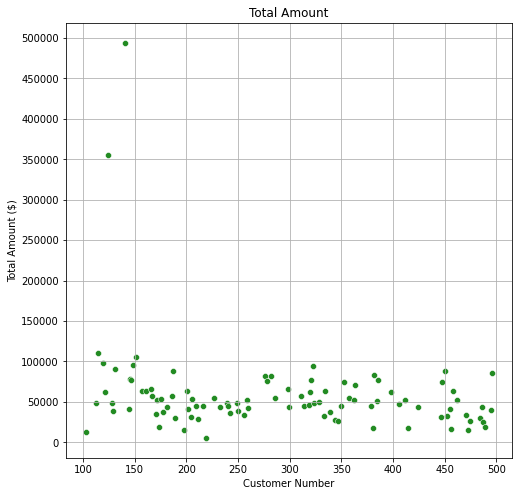

In [43]:
# Define figure
total_amount_scatter = plt.figure(figsize=(8, 8))

# Total Amount scatterplot
total_amount_scatter = sns.scatterplot(x=df_prod_cred_limit['customerNumber'], 
                                    y=df_prod_cred_limit['totalAmount'],
                                    color='forestgreen')
# Adjust X and Y-Axes ranges
plt.xticks(np.arange(100, 550, 50))
plt.yticks(np.arange(0, 550000, 50000))
# Plot title and labels
plt.xlabel('Customer Number')
plt.ylabel('Total Amount ($)')
plt.title('Total Amount')
# Plot grid
plt.grid(True)

# Show figure
plt.show()

#### Credit Limit Distribution

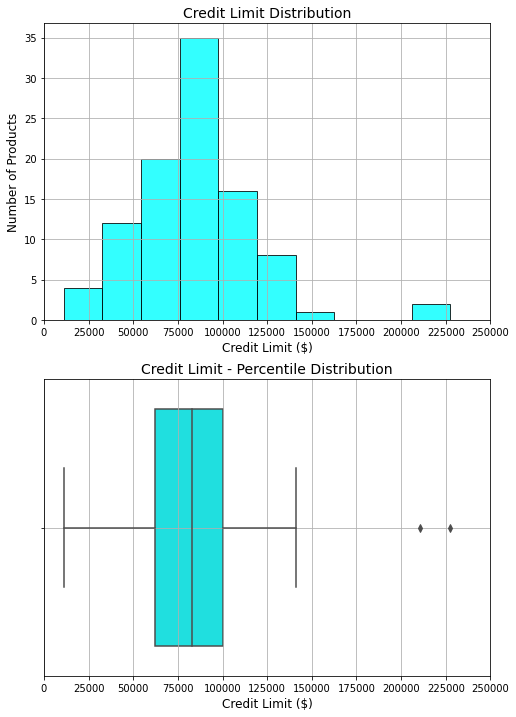

In [44]:
# Define subplot
credit_limit = plt.figure(figsize=(8, 12))

# Credit Limit Histogram
ax1 = credit_limit.add_subplot(2, 1, 1)
ax1 = plt.hist(x=df_prod_cred_limit['creditLimit'], alpha=0.8, color='cyan', 
               edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(0, 275000, 25000))
plt.yticks(np.arange(0, 40, 5))
# Plot title and labels
plt.xlabel('Credit Limit ($)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Credit Limit Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Credit Limit Box Plot
ax2 = credit_limit.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df_prod_cred_limit['creditLimit'], color='cyan')
# Adjust X-Axis range
plt.xticks(np.arange(0, 275000, 25000))
# Plot title and X-Axis label
plt.xlabel('Credit Limit ($)', fontsize=12)
plt.title('Credit Limit - Percentile Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()

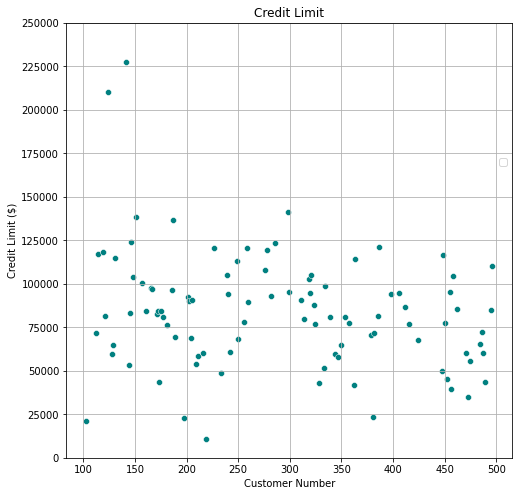

In [45]:
# Define figure
cred_limit_scatter = plt.figure(figsize=(8, 8))

# Credit Limit scatterplot
cred_limit_scatter = sns.scatterplot(x=df_prod_cred_limit['customerNumber'], 
                                    y=df_prod_cred_limit['creditLimit'],
                                     color='teal')
# Adjust X and Y-Axes ranges
plt.xticks(np.arange(100, 550, 50))
plt.yticks(np.arange(0, 275000, 25000))
# Plot title and labels
plt.xlabel('Customer Number')
plt.ylabel('Credit Limit ($)')
plt.title('Credit Limit')
# Plot legend and grid
plt.legend(bbox_to_anchor=(1, 0.7))
plt.grid(True)

# Show plot
plt.show()

#### Balance Distribution

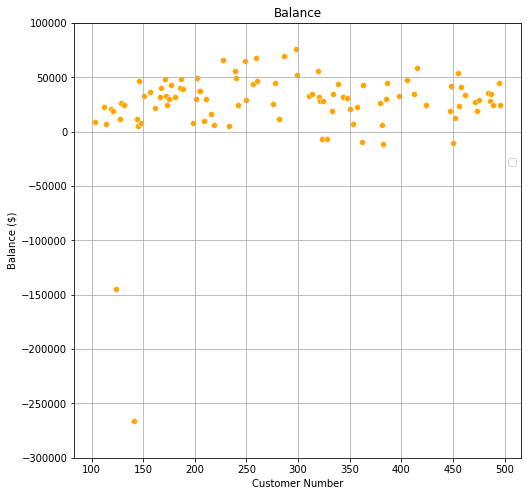

In [46]:
# Define figure
balance_scatter = plt.figure(figsize=(8, 8))

# Balance scatterplot
balance_scatter = sns.scatterplot(x=df_prod_cred_limit['customerNumber'], 
                                  y=df_prod_cred_limit['balance'],
                                  color='orange')
# Adjust X and Y-Axes ranges
plt.xticks(np.arange(100, 550, 50))
plt.yticks(np.arange(-300000, 150000, 50000))
# Plot title and labels
plt.xlabel('Customer Number')
plt.ylabel('Balance ($)')
plt.title('Balance')
# Plot legend and grid
plt.legend(bbox_to_anchor=(1, 0.7))
plt.grid(True)

# Show plot
plt.show()

#### Percentile Distributions

/usr/local/lib/python3.9/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.9/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.9/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


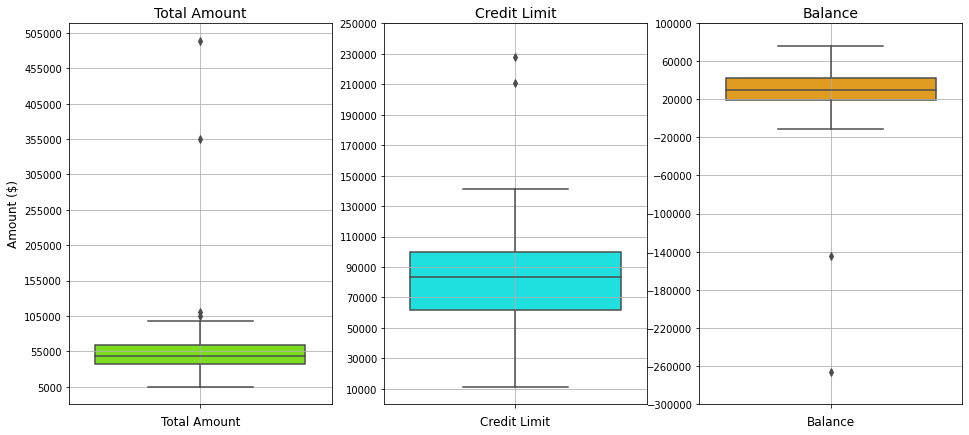

In [47]:
# Combined box plot distributions
box_plots_cred_limit = plt.figure(figsize=(16, 7))

# Total Amount
ax1 = box_plots_cred_limit.add_subplot(1, 3, 1)
ax1 = sns.boxplot(y=df_prod_cred_limit['totalAmount'], color='lawngreen', orient='h')
# Adjust X-Axis Range
plt.yticks(np.arange(5000, 550000, 50000))
# Plot title and labels
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title('Total Amount', fontsize=14)
# Plot grid
plt.grid(True)

# Credit Limit
ax2 = box_plots_cred_limit.add_subplot(1, 3, 2)
ax2 = sns.boxplot(y=df_prod_cred_limit['creditLimit'], color='cyan', orient='h')
# Adjust X-Axis Range
plt.yticks(np.arange(10000, 270000, 20000))
# Plot title and label
plt.xlabel('Credit Limit', fontsize=12)
plt.ylabel('')
plt.title('Credit Limit', fontsize=14)
# Plot grid
plt.grid(True)

# Balance
ax3 = box_plots_cred_limit.add_subplot(1, 3, 3)
ax3 = sns.boxplot(y=df_prod_cred_limit['balance'], color='orange', orient='h')
# Adjust X-Axis Range
plt.yticks(np.arange(-300000, 120000, 40000))
# Plot title and label
plt.xlabel('Balance', fontsize=12)
plt.ylabel('')
plt.title('Balance', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()

## 3. Apply K-Means Clustering

In [48]:
from sklearn.cluster import KMeans

### 3.1. Find the optimal number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

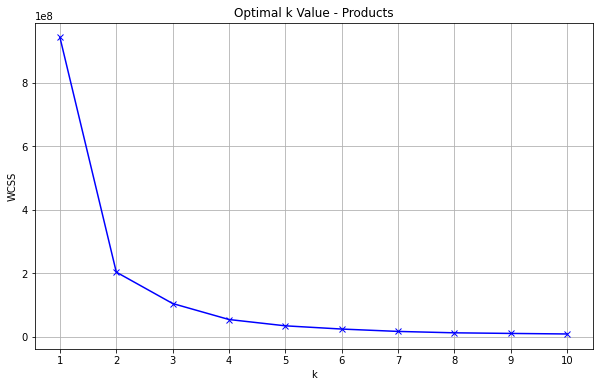

In [49]:
# Using the "Elbow Method" - WCSS
wcss = []
for i in range(1, 11):
  kmeans_prod = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_prod.fit(X_prod)
  wcss.append(kmeans_prod.inertia_)

# Define figure
optimal_k = plt.figure(figsize=(10,6))
# Plot results
optimal_k = plt.plot(range(1, 11), wcss, 'bx-')
# Adjust X-Axis range
plt.xticks(np.arange(1, 11, 1))
# Plot title and labels
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Optimal k Value - Products')
# Show grid
plt.grid(True)

# Show plot
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

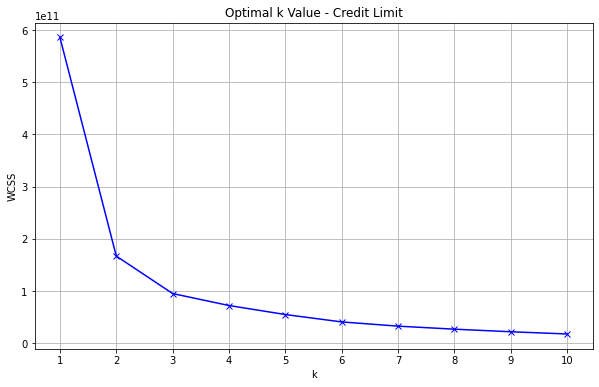

In [50]:
# Using the "Elbow Method" - WCSS
wcss = []
for i in range(1, 11):
  kmeans_cred_limit = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_cred_limit.fit(X_cred_limit)
  wcss.append(kmeans_cred_limit.inertia_)

# Define figure
optimal_k = plt.figure(figsize=(10,6))
# Plot results
optimal_k = plt.plot(range(1, 11), wcss, 'bx-')
# Adjust X-Axis range
plt.xticks(np.arange(1, 11, 1))
# Plot title and labels
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Optimal k Value - Credit Limit')
# Show grid
plt.grid(True)

# Show plot
plt.show()

##### **Number of clusters:**

In [51]:
# Products
clusters_prod = 3

# Cred Limit
clusters_cred_limit = 3

### 3.2. Define Model

In [52]:
# Define K-Means model
kmeans_prod = KMeans(n_clusters=clusters_prod, init='k-means++', random_state=42)
# Train K-Means model
y_kmeans_prod = kmeans_prod.fit_predict(X_prod)

print(y_kmeans_prod)

[1 1 1 0 0 1 2 0 2 1 1 1 2 0 0 1 2 0 1 1 1 0 2 1 1 0 2 1 1 2 2 0 2 1 0 0 0
 0 0 1 1 1 2 1 1 1 1 2 0 1 1 0 1 2 0 2 0 1 1 0 1 2 2 2 2 1 2 2 0 2 1 1 0 1
 2 1 1 1 1 2 1 0 2 1 0 2 1 2 1 2 2 0 1 2 2 2 2 0 2 0 1 1 1 1 2 2 0 1 0 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
# Define K-Means model
kmeans_cred_limit = KMeans(n_clusters=clusters_cred_limit, init='k-means++', random_state=42)
# Train K-Means model
y_kmeans_cred_limit = kmeans_cred_limit.fit_predict(X_cred_limit)

print(y_kmeans_cred_limit)

[1 1 0 0 0 2 1 1 0 2 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1
 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
# K-Means values - Products
print(kmeans_prod.inertia_)          # K-Means inertia
print(kmeans_prod.cluster_centers_)  # Centroids of each cluster
print(kmeans_prod.n_iter_)           # Number of iterations
print('')

# K-Means values - Credit Limit
print(kmeans_cred_limit.inertia_)          # K-Means inertia
print(kmeans_cred_limit.cluster_centers_)  # Centroids of each cluster
print(kmeans_cred_limit.n_iter_)           # Number of iterations

104233900.23820862
[[4617.35714286   59.3525      108.36714286]
 [7939.93617021   54.68638298  100.30255319]
 [1504.8          50.03828571   94.27885714]]
9

95017529064.77635
[[ 2.80773585e+02  6.58641342e+04  1.00733962e+05  3.48698281e+04
   5.66037736e-02]
 [ 3.04767442e+02  3.34484516e+04  5.76139535e+04  2.41655019e+04
   4.65116279e-02]
 [ 1.32500000e+02  4.24613915e+05  2.19050000e+05 -2.05563915e+05
   1.00000000e+00]]
9


## 4. Visualize Results

##### **Colours for each cluster:**

- **Cluster 1** - Red
- **Cluster 2** - Blue
- **Cluster 3** - Green

### 4.1. Products

##### **Products Indices:**

- **0** - Quantity (in stock)
- **1** - Credit Limit
- **2** - Balance

#### Quantity vs. Buy Price

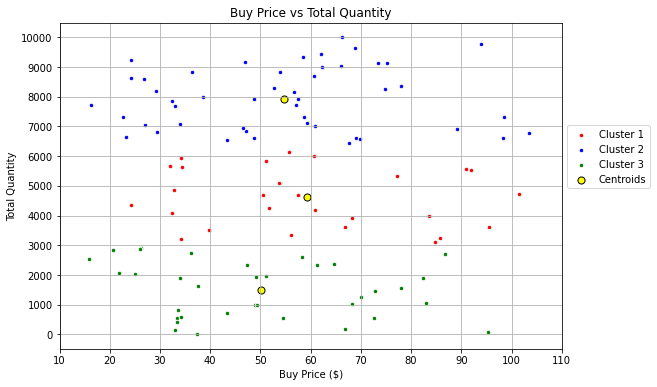

In [55]:
# Define figure
fig1_1 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig1_1 = plt.scatter(X_prod[y_kmeans_prod == 0, 1], X_prod[y_kmeans_prod == 0, 0], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig1_1 = plt.scatter(X_prod[y_kmeans_prod == 1, 1], X_prod[y_kmeans_prod == 1, 0], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig1_1 = plt.scatter(X_prod[y_kmeans_prod == 2, 1], X_prod[y_kmeans_prod == 2, 0], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
# Plot centroids
fig1_1 = plt.scatter(kmeans_prod.cluster_centers_[:, 1], kmeans_prod.cluster_centers_[:, 0], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust X and Y-Axes ranges
plt.xticks(np.arange(10, 120, 10))
plt.yticks(np.arange(0, 11000, 1000))
# Plot title and labels
plt.xlabel('Buy Price ($)')
plt.ylabel('Total Quantity')
plt.title('Buy Price vs Total Quantity')
# Plot legend and grid
plt.legend(bbox_to_anchor=(1, 0.7))
plt.grid(True)

# Show plot
plt.show()

#### Quantity vs. MSRP

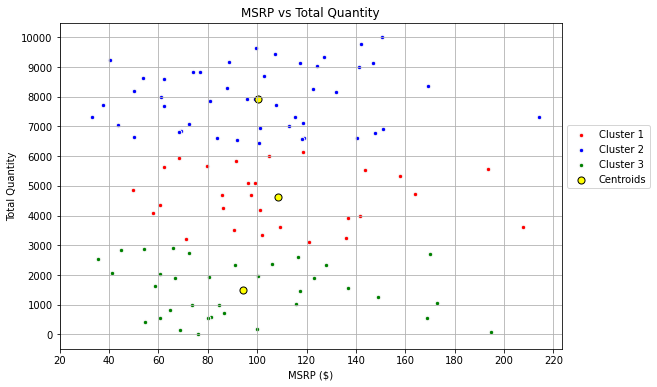

In [56]:
# Define figure
fig2_1 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig2_1 = plt.scatter(X_prod[y_kmeans_prod == 0, 2], X_prod[y_kmeans_prod == 0, 0], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig2_1 = plt.scatter(X_prod[y_kmeans_prod == 1, 2], X_prod[y_kmeans_prod == 1, 0], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig2_1 = plt.scatter(X_prod[y_kmeans_prod == 2, 2], X_prod[y_kmeans_prod == 2, 0], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
# Plot centroids
fig2_1 = plt.scatter(kmeans_prod.cluster_centers_[:, 2], kmeans_prod.cluster_centers_[:, 0], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust X and Y-Axes ranges
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(0, 11000, 1000))
# Plot title and labels
plt.xlabel('MSRP ($)')
plt.ylabel('Total Quantity')
plt.title('MSRP vs Total Quantity')
# Plot legend and grid
plt.legend(bbox_to_anchor=(1, 0.7))
plt.grid(True)

# Show plot
plt.show()

### 4.2. Credit Limit

**Credit Limit Indices:**

- **0** - Customer Number
- **1** - Total Amount
- **2** - Credit Limit
- **3** - Balance
- **4** - Over Credit Limit?

#### Total Amount

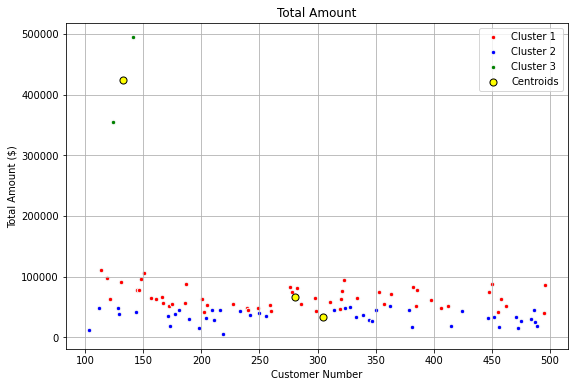

In [57]:
# Define figure
fig1_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig1_2 = plt.scatter(X_cred_limit[y_kmeans_cred_limit == 0, 0], X_cred_limit[y_kmeans_cred_limit == 0, 1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig1_2 = plt.scatter(X_cred_limit[y_kmeans_cred_limit == 1, 0], X_cred_limit[y_kmeans_cred_limit == 1, 1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig1_2 = plt.scatter(X_cred_limit[y_kmeans_cred_limit == 2, 0], X_cred_limit[y_kmeans_cred_limit == 2, 1], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
# Plot centroids
fig1_2 = plt.scatter(kmeans_cred_limit.cluster_centers_[:, 0], kmeans_cred_limit.cluster_centers_[:, 1], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust X and Y-Axes ranges
plt.xticks(np.arange(100, 550, 50))
plt.yticks(np.arange(0, 600000, 100000))
# Plot title and labels
plt.xlabel('Customer Number')
plt.ylabel('Total Amount ($)')
plt.title('Total Amount')
# Plot legend and grid
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

#### Credit Limit

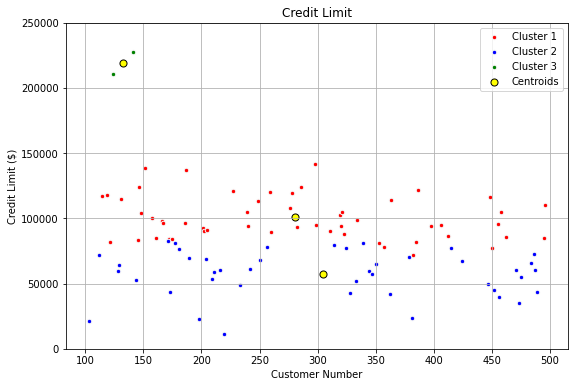

In [58]:
# Define figure
fig2_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig2_2 = plt.scatter(X_cred_limit[y_kmeans_cred_limit == 0, 0], X_cred_limit[y_kmeans_cred_limit == 0, 2], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig2_2 = plt.scatter(X_cred_limit[y_kmeans_cred_limit == 1, 0], X_cred_limit[y_kmeans_cred_limit == 1, 2], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig2_2 = plt.scatter(X_cred_limit[y_kmeans_cred_limit == 2, 0], X_cred_limit[y_kmeans_cred_limit == 2, 2], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
# Plot centroids
fig2_2 = plt.scatter(kmeans_cred_limit.cluster_centers_[:, 0], kmeans_cred_limit.cluster_centers_[:, 2], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust X and Y-Axes ranges
plt.xticks(np.arange(100, 550, 50))
plt.yticks(np.arange(0, 300000, 50000))
# Plot title and labels
plt.xlabel('Customer Number')
plt.ylabel('Credit Limit ($)')
plt.title('Credit Limit')
# Plot legend and grid
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

#### Balance

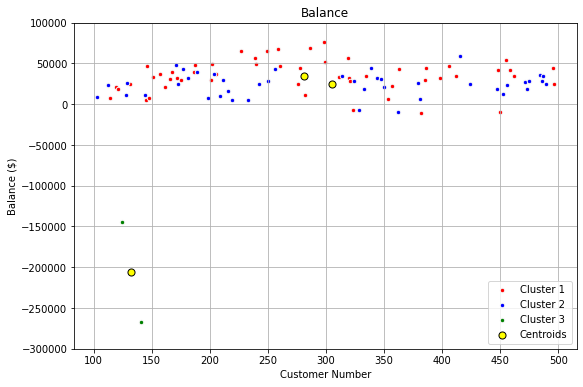

In [59]:
# Define figure
fig3_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig3_2 = plt.scatter(X_cred_limit[y_kmeans_cred_limit == 0, 0], X_cred_limit[y_kmeans_cred_limit == 0, 3], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig3_2 = plt.scatter(X_cred_limit[y_kmeans_cred_limit == 1, 0], X_cred_limit[y_kmeans_cred_limit == 1, 3], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig3_2 = plt.scatter(X_cred_limit[y_kmeans_cred_limit == 2, 0], X_cred_limit[y_kmeans_cred_limit == 2, 3], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
# Plot centroids
fig3_2 = plt.scatter(kmeans_cred_limit.cluster_centers_[:, 0], kmeans_cred_limit.cluster_centers_[:, 3], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust X and Y-Axes ranges
plt.xticks(np.arange(100, 550, 50))
plt.yticks(np.arange(-300000, 150000, 50000))
# Plot title and labels
plt.xlabel('Customer Number')
plt.ylabel('Balance ($)')
plt.title('Balance')
# Plot legend and grid
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()

## 5. Export Data

#### Export dataframe to .csv file

In [60]:
# Dataframe: Products table
df_products.to_csv('/content/drive/My Drive/Colab Notebooks/ClassicModels/data/Products.csv', 
                    encoding='utf-8', index=False)
# Dataframe: Products - Quantity per Product Line
os.chdir(r'/content/drive/My Drive/Colab Notebooks/ClassicModels/data/Products')
df_prod_line.to_csv('/content/drive/My Drive/Colab Notebooks/ClassicModels/data/Products/P-AmtLeft.csv', 
                    encoding='utf-8', index=False)
# Dataframe: Products - Customers over Credit Limit
df_prod_cred_limit.to_csv('/content/drive/My Drive/Colab Notebooks/ClassicModels/data/Products/P-OverCredLimit.csv', 
                    encoding='utf-8', index=False)

#### Verify if successful

In [61]:
# Dataframe: Products table
os.chdir(r'/content/drive/My Drive/Colab Notebooks/ClassicModels/data/')
df_products_new = pd.read_csv('Customers.csv')
df_products_new

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,1370.0,21000
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,NaN,Las Vegas,NV,83030,USA,1166.0,71800
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,1370.0,118200
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,NaN,Stavern,NaN,4110,Norway,1504.0,81700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,486,Motor Mint Distributors Inc.,Salazar,Rosa,2155559857,11328 Douglas Av.,NaN,Philadelphia,PA,71270,USA,1323.0,72600
118,487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,NaN,Brisbane,CA,94217,USA,1165.0,60300
119,489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,NaN,London,NaN,WA1 1DP,UK,1501.0,43300
120,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,NaN,Boston,MA,51003,USA,1188.0,85100


In [62]:
# Dataframe: Products - Quantity per Product Line
os.chdir(r'/content/drive/My Drive/Colab Notebooks/ClassicModels/data/Products')
df_prod_line_new = pd.read_csv('P-AmtLeft.csv', encoding='utf-8')
df_prod_line_new

,productLine,totalQuantity,amountOrdered,amountLeft
0,Classic Cars,5844033,35582,5808451
1,Motorcycles,1915517,12778,1902739
2,Planes,1744036,11872,1732164
3,Ships,732251,8532,723719
4,Trains,450792,2818,447974
5,Trucks and Buses,1003828,11001,992827
6,Vintage Cars,3439570,22933,3416637


In [63]:
# Dataframe: Products - Customers over Credit Limit
df_prod_cred_limit_new = pd.read_csv('P-OverCredLimit.csv', encoding='utf-8')
df_prod_cred_limit_new

,customerNumber,totalAmount,creditLimit,balance,overCreditLimit
0,103,12250.56,21000.0,8749.44,0
1,112,48868.26,71800.0,22931.74,0
2,114,110274.00,117300.0,7026.00,0
3,119,97697.82,118200.0,20502.18,0
4,121,62833.27,81700.0,18866.73,0
...,...,...,...,...,...
93,486,44128.02,72600.0,28471.98,0
94,487,25340.25,60300.0,34959.75,0
95,489,18718.11,43300.0,24581.89,0
96,495,40297.05,85100.0,44802.95,0
